<a href="https://colab.research.google.com/github/parthkohli92/Tensorflow/blob/main/convolutional_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Networks and Computer Vision with TensorFlow

1. Get the Data

In [1]:
import zipfile 

# Download zip file 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the download file 
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-10-21 07:30:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 66.102.1.128, 172.253.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  63.6MB/s    in 1.6s    

2021-10-21 07:30:09 (63.6 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
!ls pizza_steak

test  train


We can see we've got test and train folders

In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
!ls pizza_steak/test/steak/

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [6]:
import os 

# Walking through pizza_steak directory and list number of files 
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [8]:
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_train

750

In [9]:
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))
num_steak_images_test

250

In [10]:
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
num_pizza_images_test

250

In [11]:
# View an image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def randomImage(target_dir, target_class):
  target_folder = target_dir+target_class

  randomImage = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + "/" + randomImage[0])
  plt.imshow(img)
  
  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


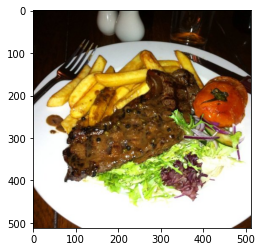

In [12]:
img = randomImage(target_dir="pizza_steak/train/",
                  target_class="steak")

In [13]:
img

array([[[ 6,  2,  0],
        [ 7,  3,  0],
        [ 7,  3,  0],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       [[ 7,  3,  0],
        [ 8,  4,  1],
        [ 8,  4,  1],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 5,  4,  2]],

       [[ 7,  3,  0],
        [ 8,  4,  1],
        [ 8,  4,  1],
        ...,
        [ 5,  4,  2],
        [ 5,  4,  2],
        [ 5,  4,  2]],

       ...,

       [[67, 26,  4],
        [65, 27,  4],
        [64, 26,  3],
        ...,
        [50, 23,  2],
        [51, 24,  3],
        [51, 26,  4]],

       [[68, 27,  5],
        [67, 26,  4],
        [65, 27,  4],
        ...,
        [49, 24,  2],
        [49, 24,  2],
        [49, 24,  2]],

       [[69, 28,  6],
        [68, 27,  5],
        [65, 27,  4],
        ...,
        [53, 28,  6],
        [52, 27,  5],
        [49, 27,  4]]], dtype=uint8)

In [14]:
img.shape #(width,height,colour channels)

(512, 512, 3)

In [15]:
# all the pixel values bw 0 and 1 
img/255.

array([[[0.02352941, 0.00784314, 0.        ],
        [0.02745098, 0.01176471, 0.        ],
        [0.02745098, 0.01176471, 0.        ],
        ...,
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157]],

       [[0.02745098, 0.01176471, 0.        ],
        [0.03137255, 0.01568627, 0.00392157],
        [0.03137255, 0.01568627, 0.00392157],
        ...,
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01960784, 0.01568627, 0.00784314]],

       [[0.02745098, 0.01176471, 0.        ],
        [0.03137255, 0.01568627, 0.00392157],
        [0.03137255, 0.01568627, 0.00392157],
        ...,
        [0.01960784, 0.01568627, 0.00784314],
        [0.01960784, 0.01568627, 0.00784314],
        [0.01960784, 0.01568627, 0.00784314]],

       ...,

       [[0.2627451 , 0.10196078, 0.01568627],
        [0.25490196, 0.10588235, 0.01568627],
        [0.25098039, 0

Going on with the model.


In [16]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# setting the seed
tf.random.set_seed(42)

# preprocess data 
train_dataget = ImageDataGenerator(rescale=1./255)
valid_dataget = ImageDataGenerator(rescale=1./255)

# setup the train and test directories 
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# import data from directories and turn it into batches 
train_data = train_dataget.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_dataget.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [18]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="softmax") # binary activation output
])

# Compile the model
model1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit the model

history_1 = model1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 47s 352ms/step - loss: 0.5533 - accuracy: 0.5000 - val_loss: 0.5011 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 15s 331ms/step - loss: 0.4395 - accuracy: 0.5000 - val_loss: 0.4096 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 15s 330ms/step - loss: 0.3936 - accuracy: 0.5000 - val_loss: 0.3468 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 16s 347ms/step - loss: 0.3730 - accuracy: 0.5000 - val_loss: 0.3148 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 16s 347ms/step - loss: 0.3226 - accuracy: 0.5000 - val_loss: 0.2853 - val_accuracy: 0.5000


In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

Fitting a previouly used model

In [20]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4,"relu"),
  tf.keras.layers.Dense(2,"relu"),
  tf.keras.layers.Dense(1,"sigmoid")
])

model2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_2 = model2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                       validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 306ms/step - loss: 0.8077 - accuracy: 0.5093 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 14s 300ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 300ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 14s 300ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 14s 300ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 602,129
Trainable params: 602,129
Non-trainable params: 0
_________________________________________________________________


We can notice that there are much larger number of parameters in model2 vs the model1

In [22]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, "relu"),
  tf.keras.layers.Dense(100, "relu"),
  tf.keras.layers.Dense(100, "relu"),
  tf.keras.layers.Dense(100, "relu"),
  tf.keras.layers.Dense(1, "softmax")
])

model3.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.RMSprop(),
               metrics=["accuracy"])

history_3 = model3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 313ms/step - loss: 6.9930 - accuracy: 0.5000 - val_loss: 1.3429 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 14s 310ms/step - loss: 1.1227 - accuracy: 0.5000 - val_loss: 1.0686 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 310ms/step - loss: 0.6903 - accuracy: 0.5000 - val_loss: 0.5077 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 15s 313ms/step - loss: 0.6259 - accuracy: 0.5000 - val_loss: 0.5200 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 15s 318ms/step - loss: 0.5657 - accuracy: 0.5000 - val_loss: 0.4746 - val_accuracy: 0.5000


In [23]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 15,083,301
Trainable params: 15,083,301
Non-trainable params: 0
__________________________________________

 And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

# Binary Classification: Lets break it down 

1. Become one with data 
2. Preprocess the data 
3. Create a model 
4. Fit the model 
5. Evaluate the model 
6. Adjust different parameter and improve model (baseline)
7. Repeat until satified 

#### 1. Import and become one with data 

Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


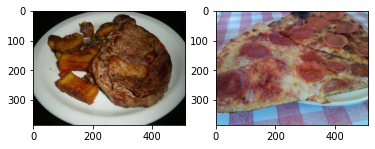

In [24]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = randomImage("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = randomImage("pizza_steak/train/", "pizza")

#### 2. Preprocess the data 

In [25]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [27]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [29]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.73333335, 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.7490196 , 0.5529412 , 0.3529412 ],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7568628 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.30980393],
          [0.78823537, 0.5372549 , 0.28627452]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [30]:
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

#### 3. Create a model 


In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
model4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1, activation="softmax")
])

In [33]:
model4.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

4. Fitting a model 

* Steps per epoch= this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)

* validation_steps= same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)


In [34]:
len(train_data), len(test_data)

(47, 16)

In [35]:
history_4 = model4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 256ms/step - loss: 1.4859 - accuracy: 0.5000 - val_loss: 0.4711 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 246ms/step - loss: 0.4572 - accuracy: 0.5000 - val_loss: 0.4232 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3552 - accuracy: 0.5000 - val_loss: 0.3695 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.2053 - accuracy: 0.5000 - val_loss: 0.3878 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 245ms/step - loss: 0.0793 - accuracy: 0.5000 - val_loss: 0.4534 - val_accuracy: 0.5000


5. Evaluation the model 

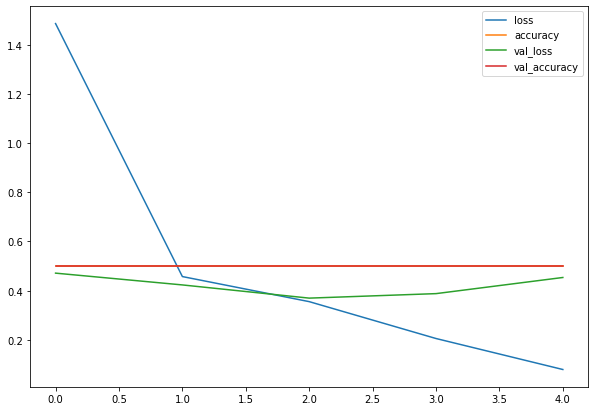

In [36]:
import pandas as pd 
pd.DataFrame(history_4.history).plot(figsize=(10,7));

Let's separate the accuracy and loss curves.

In [37]:
def lossCurve(history):
  loss = history.history['loss']
  val_loss= history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

   # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

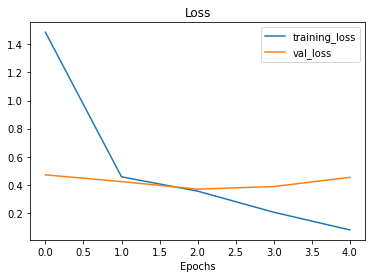

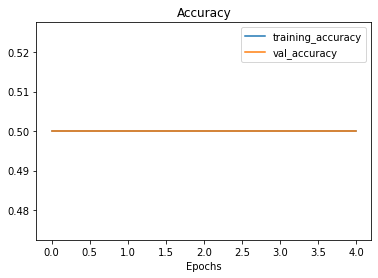

In [38]:
# Loss curves of model4
lossCurve(history_4)

In [39]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


6. Adjust the model parameters

For the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

* A ConvNet with max pooling
* A ConvNet with max pooling and data augmentation

In [47]:
model5 = Sequential([
  Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

In [48]:
model5.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=["accuracy"])

In [49]:
history_5 = model5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 230ms/step - loss: 0.6198 - accuracy: 0.6433 - val_loss: 0.5408 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4530 - accuracy: 0.7933 - val_loss: 0.3575 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4033 - accuracy: 0.8360 - val_loss: 0.3607 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4022 - accuracy: 0.8280 - val_loss: 0.3282 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3890 - accuracy: 0.8293 - val_loss: 0.3520 - val_accuracy: 0.8340


In [50]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

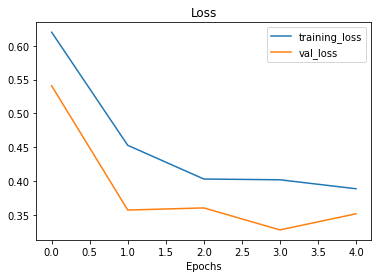

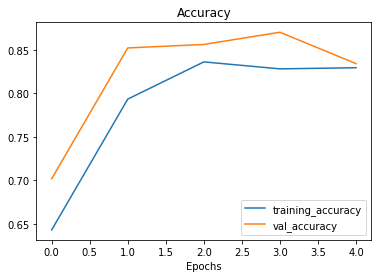

In [51]:
lossCurve(history_5)

We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

In [53]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [56]:
# Import data and augment it from training directory 

print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

print("Non-Augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images")
test_images = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary'
                                               )


Augmented training images:
Found 1500 images belonging to 2 classes.
Non-Augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images
Found 500 images belonging to 2 classes.


In [57]:
# get data batch samples

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

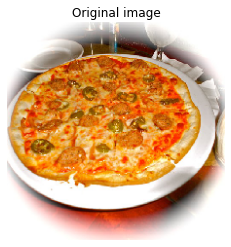

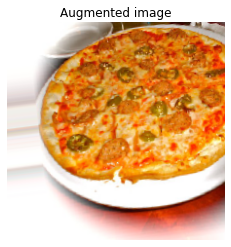

In [58]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [68]:
model6 = Sequential([
  Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(20,3, activation='relu'),
  MaxPool2D(),
  Conv2D(10,3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='softmax')
]) 

model6.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history_6 = model6.fit(train_data_augmented,
                       epochs=7,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/7
47/47 [==============================] - 27s 558ms/step - loss: 0.7174 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/7
47/47 [==============================] - 26s 546ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/7
47/47 [==============================] - 26s 545ms/step - loss: 0.6960 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/7
47/47 [==============================] - 26s 543ms/step - loss: 0.7199 - accuracy: 0.5000 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 5/7
47/47 [==============================] - 26s 545ms/step - loss: 0.7057 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 6/7
47/47 [==============================] - 26s 546ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 7/7
47/47 [==============================] - 26s 544ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5000


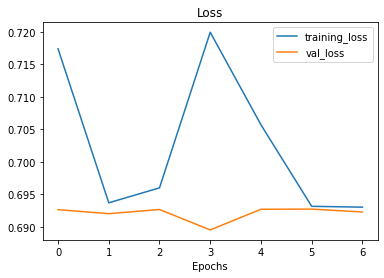

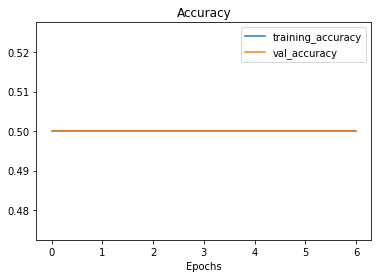

In [69]:
lossCurve(history_6)

--2021-10-21 08:52:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2021-10-21 08:52:34 (71.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



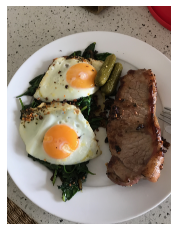

In [70]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [71]:
steak.shape

(4032, 3024, 3)

In [72]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [73]:
steak= load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [75]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak


Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [76]:
pred = model6.predict(steak)
pred

array([[1.]], dtype=float32)